# 어휘 공기 행렬
## 어휘 공기
어휘 공기(word co-occurrence)란 두 개 이상의 어휘가 일정한 범위(range) 혹은 거리(distance) 내에서 함께 출현하는 현상을 말한다. 여기서 어휘란 문자에서부터 형태소, 단어, 합성어, 혹은 구 이상의 단위로 일정한 의미를 부여할 수 있는 언어 단위를 뜻한다. 문헌정보학에서는 동시단어(co-word)라는 용어를 사용하며 언어학에서는 비슷한 개념으로 연어(collocation)이라는 용어를 사용한다. 정보학 및 전산학에서 사용하는 엔그램(n-gram)은 거리가 일정한 경우의 어휘 공기로 볼 수 있다.

>You shall know a word by company it keeps (J. R. Firth, 1957)

공기의 범위는 여러 가지로 정의될 수 있는데, 예를 들면 구, 문장, 단락, 문단, 절, 장, 혹은 문서 전체일 수도 있다. 또한 공기의 관계 혹은 종류 역시 여러 가지로 정의가 가능한데, 일정한 범위나 거리 안에서 다른 조건 없이 함께 출현하는 경우인 일반 공기와 공기하는 어휘 사이에 주어-동사, 목적어-동사, 수식어-피수식어 등과 같은 문법적 관련이 있는 경우, 상위어-하위어, 전체어-부분어 등의 의미적 관련이 있는 경우 등 특별한 공기 관계도 살펴볼 수 있다.

공기 관계는 개별 문서 혹은, 문서 집합으로부터 어느 정도 추상화된 정보를 얻을 수 있도록 해준다.
추상화된 정보란 문서로부터 추출 가능한 개념 혹은 의미, 나아가 지식을 뜻한다. 물론 군집과 분류 과제를 통해서도 추상화된 정보를 얻을 수 있었으나 문서 집합 전체를 아우루는 지식의 습득에 이르지는 못하였다. 추상화된 정보를 얻기 위해서는 정보 처리의 기본 단위인 어휘들이 어떤 형태로든 형식적인 추상화 단계를 거쳐야 하는데 가장 간단한 것이 바로 동시 출현 혹은 공기이다. 이는 두 어휘 각자가 일정한 개념을 나타날 때에 공기한 두 어휘는 개별 개념보다 추상화된 개념을 나타낼 것이며, 이 공기 현상을 면밀히 살펴보아 문서 집합에 내재된 지식을 얻어낼 수 있으리라는 가정에 기인한다.

## 어휘 공기 행렬의 구성
어휘 공기를 추출하여 다양한 형태로 저장해 보자.
우리의 목표는 다음과 같은 형태의 어휘 공기 행렬을 구성하는 것이다.

|        | 공책 | 연필 | 지우개 |
| ------ | :--: | :--: | :----: |
| 공책   | 4    | 2    | 3      |
| 연필   | 2    | 3    | 2      |
| 지우개 | 3    | 2    | 4      |

이 표는 3개의 어휘가 일정한 범위, 예를 들어 동일 문서 안에서 얼마나 공기했는지, 즉 공기 빈도는 나타내는 표이다.
이를 수학적으로는 행렬로 나타낼 수 있고 이를 어휘 공기 행렬이라고 부른다.

두 단어의 공기 빈도를 계수하는 데에는 어휘 빈도 계수의 경우와 마찬가지로 Counter 클래스를 사용할 수 있다.
차이점은 계수의 대상, 즉 Counter 객체의 키를 두 단어로 이루어진 복합키로 만들어야 한다는 것이다.
복합키를 만들기 위해서는 튜플을 이용하면 된다.

In [1]:
# Counter를 이용한 어휘 공기 행렬 생성

from collections import Counter
from itertools import combinations
from tqdm import tqdm_notebook
import ujson

NOMINAL_POSES = ["NC", "NQ"]
MA_KEY = "body_ma"


def read_documents(input_file_name):
    """주어진 이름의 파일에서 문서들을 읽어서 돌려준다."""
    
    documents = []
    
    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for line in tqdm_notebook(input_file, desc="Reading documents"):
            morphs = []
            json_obj = ujson.loads(line)

            for sent_anal in json_obj[MA_KEY]:
                for morph_lex, morph_cat in sent_anal:
                    if not is_nominal(morph_cat):
                        continue

                    morphs.append(morph_lex)

            document = " ".join(morphs)
            documents.append(document)

    return documents


def is_nominal(morph_cat):
    """주어진 품사가 체언 품사인지 판별한다."""
    
    if morph_cat in NOMINAL_POSES:
        return True
    
    return False


def build_word_cooc_mat(documents):
    """주어진 문서들로부터 어휘 공기 행렬를 생성하여 돌려준다."""
    
    word_cooc_mat = Counter()

    for document in tqdm_notebook(documents, 
                                  desc="Building matrix"):
        words = document.split()
        words = sorted(set(words))

        for word1, word2 in combinations(words, 2):
            word_cooc_mat[(word1, word2)] += 1

    return word_cooc_mat


def write_word_cooc_mat(output_file_name, word_cooc_mat):
    """파일에 어휘 공기 행렬을 출력한다."""
    
    with open(output_file_name, "w", encoding="utf-8") as output_file:
        for (word1, word2), count in tqdm_notebook(word_cooc_mat.most_common(),
                                                   desc="Writing matrix"):
            print("{}\t{}\t{}".format(word1, word2, count), file=output_file)

        
def main():
    """형태소 분석 문서를 읽어 어휘 공기 행렬를 생성하여 출력한다."""
    
    input_file_name = "../data/speeches/nmh_speeches.ma.txt"
    output_file_name = "../data/speeches/nmh_speeches.cooc.txt"
    documents = read_documents(input_file_name)
    word_cooc_mat = build_word_cooc_mat(documents)
    write_word_cooc_mat(output_file_name, word_cooc_mat)


# 실행
main()

위의 스크립트에서 사용된 `read_documents()` 함수는 JSON 라인 형식의 형태소 분석 파일에서 지정한 주요 품사에 해당하는 형태소들만 읽어서 문서를 생성하여 돌려준다.

어휘 공기 행렬은 `build_word_cooc_mat()` 함수에서 생성한다. 
우리는 한 문서에서의 어휘 공기를 측정하므로 문서 내에서 두 어휘가 여러 번 공기하였을 경우 한 번만 계수하면 된다.
그러므로 `set()` 함수를 이용하여 문서에 발현한 어휘들의 중복을 제거한 후 어휘들의 쌍으로 복합키를 만들어 공기 빈도를 계수한다. itertools 모듈의 `combinations()` 함수의 사용법을 잘 익혀두자.

위에서 규모가 큰 텍스트 집합 등에 대한 반복 처리가 이루어질 때에 진행률을 표시하기 위해서 tqdm 모듈을 사용하였다. 이 라이브러리 모듈은 pip으로 설치해야 한다.

위에서 사용한 복합키에 의한 어휘 공기 행렬 생성은 처리가 간단하기는 하지만 복합키의 내용에 중복이 많아서 Counter의 키의 개수가 많아져 복잡도가 증가한다.
또한 애초에 우리가 목표로 하는 어휘 공기 행렬과 같은 정보를 담고 있지만 직관적인 구조를 가지고 있지는 않다.
행렬을 행과 열로 이루어진 2차원의 구조이기에 이를 반영하는 2차원의 자료 구조가 어휘 공기 행렬의 구현에 더 적합할 것이다.
이러한 조건에 걸맞는 구조로 Counter 객체를 내포한 딕셔너리를 생각해 볼 수 있다.

In [2]:
# Counter의 딕셔너리를 이용한 어휘 공기 행렬 생성

from collections import Counter
from itertools import combinations
from operator import itemgetter
from tqdm import tqdm_notebook
import ujson

NOMINAL_POSES = ["NC", "NQ"]
MA_KEY = "body_ma"


def read_documents(input_file_name):
    """주어진 이름의 파일에서 문서들을 읽어서 돌려준다."""
    
    documents = []

    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for line in tqdm_notebook(input_file, desc="Reading documents"):
            morphs = []
            json_obj = ujson.loads(line)

            for sent_anal in json_obj[MA_KEY]:
                for morph_lex, morph_cat in sent_anal:
                    if not is_nominal(morph_cat):
                        continue

                    morphs.append(morph_lex)

            document = " ".join(morphs)
            documents.append(document)

    return documents


def is_nominal(morph_cat):
    """주어진 품사가 체언 품사인지 판별한다."""
    
    if morph_cat in NOMINAL_POSES:
        return True
    
    return False


def build_word_cooc_mat(documents):
    """주어진 문서들로부터 어휘 공기 행렬를 생성하여 돌려준다."""

    word_cooc_mat = {}

    for document in tqdm_notebook(documents, desc="Building matrix"):
        words = document.split()
        words = sorted(set(words))

        for word1, word2 in combinations(words, 2):
            if word1 not in word_cooc_mat:
                word_cooc_mat[word1] = Counter()
                
            word_cooc_mat[word1][word2] += 1

    return word_cooc_mat


def write_word_cooc_mat(output_file_name, word_cooc_mat):
    """파일에 어휘 공기 행렬을 출력한다."""
    
    word_cooc_list = get_word_cooc_list(word_cooc_mat)
    
    with open(output_file_name, "w", encoding="utf-8") as output_file:
        for word1, word2, count in tqdm_notebook(sorted(word_cooc_list, 
                                                        key=itemgetter(2),
                                                        reverse=True),
                                                 desc="Writing matrix"):
            print("{}\t{}\t{}".format(word1, word2, count), file=output_file)
    
    
def get_word_cooc_list(word_cooc_mat):
    """딕셔너리형의 어휘 공기 행렬을 리스트형으로 바꾸어 돌려준다."""
    
    word_cooc_list = []
    
    for word1 in word_cooc_mat:
        for word2 in word_cooc_mat[word1]:
            count = word_cooc_mat[word1][word2]
            word_cooc_list.append((word1, word2, count))
            
    return word_cooc_list
        
    
def main():
    """형태소 분석 문서를 읽어 어휘 공기 행렬를 생성하여 출력한다."""
    
    input_file_name = "../data/speeches/nmh_speeches.ma.txt"
    output_file_name = "../data/speeches/nmh_speeches.cooc2.txt"
    documents = read_documents(input_file_name)
    word_cooc_mat = build_word_cooc_mat(documents)
    write_word_cooc_mat(output_file_name, word_cooc_mat)


# 실행
main()

위의 코드는 `build_word_cooc_mat()`를 수정하여 Counter를 내포한 딕셔너리를 사용하도록 한 것이다. 
딕셔너리의 키로는 공기어 쌍 중 첫 번째 어휘를 이용하고 이에 대한 값으로는 Counter 객체를 지정한다.
이 Counter 객체의 키는 공기어 쌍의 두 번째 어휘가 되고 이에 대한 값은 이 두 어휘의 공기 빈도를 저장한다. 
`write_word_cooc_mat()` 함수도 Counter를 내포한 딕셔너리를 위하여 수정하였다.

>Couter 객체를 내장한 딕셔너리를 사용할 경우 공기 빈도의 역순 정렬을 하려면 별도의 정렬 과정을 거쳐야 한다.

# 어휘 공기 네트워크의 생성
어휘 공기 네트워크 분석은 어휘들 간의 공기 관계를 네트워크로 표현하여 분석 대상 문서 집합에 내재된 어휘들 간의 의미 관계 등의 추상화된 정보를 얻어내기 위한 분석 방법이다. 다른 말로 하면, 한 단어의 의미를 다른 단어들과의 공기 패턴으로 대체하여 나타낸 뒤 이들 어휘 간의 거리를 구한 다음, 이를 네트워크로 표현하는 것이다. 이 분석 방법은 어휘 공기 분석에 사회 네트워크 분석(Social Network Analysis) 방법을 적용한 것이다.

>이 강좌에서는 사회 네트워크 분석에 관해서 자세히 다루지 않는다. 사회 네트워크 분석의 기본적인 개념과 활용례에 대하여 다음 책을 참고할 수 있다. 김용학(2007), 『사회 연결망 분석』, 박영사.

어휘 공기 네트워크 분석의 절차는 다음과 같다.

1. 입력 문서 집합으로부터 어휘 공기 행렬을 생성한다.
2. 어휘 공기 행렬로부터 어휘 유사도 행렬을 생성한다.
3. 어휘 유사도 행렬을 네트워크로 표현한다.
4. 네트워크를 시각화한다.

이어서 네트워크의 구성에는 networkx 모듈을 사용한다. 이 모듈은 다양한 네트워크 분석 기능을 순수 파이썬으로 구현한 것으로 사용 방법이 비교적 간단하다. 시각화에는 matplotlib을 사용한다.

>대규모의 네트워크 분석에는 igraph, graph-tool, SNAP과 같이 C/C++ 언어로 작성된 라이브러리에서 제공하는 파이썬 바인딩이 유용할 수도 있다. 보고서 등에 활용하기 위해서는 네트워크 그림을 편집할 수 있는 Gephi, Cytoscape 등이 편리하다.

이제 위에서 설명한 절차를 구현한 스크립트의 소스를 보자.

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

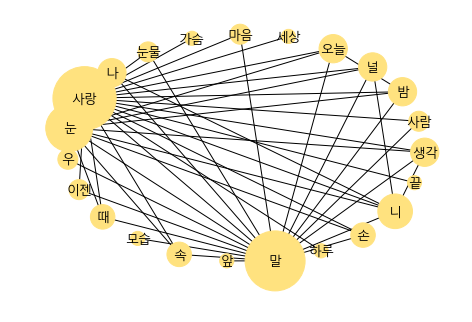

In [4]:
# 어휘 공기 네트워크 시각화

import sys
from collections import Counter
from itertools import combinations
from operator import itemgetter
from tqdm import tqdm_notebook
import ujson
import networkx as nx
import matplotlib.pyplot as plt

NOMINAL_POSES = ["NC", "NQ"]
TARGET_YEARS = ["2014", "2015"]
MA_KEY = "lyrics_ma"
YEAR_KEY = "distribution_date"
NUM_WORD_COOCS = 50


def read_documents(input_file_name):
    """주어진 이름의 파일에서 문서들을 읽어서 돌려준다."""
    
    documents = []

    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for line in tqdm_notebook(input_file, desc="Reading documents"):
            morphs = []
            json_obj = ujson.loads(line)
            
            if not is_target_year(json_obj):
                continue

            for sent_anal in json_obj[MA_KEY]:
                for morph_lex, morph_cat in sent_anal:
                    if not is_nominal(morph_cat):
                        continue

                    morphs.append(morph_lex)

            document = " ".join(morphs)
            documents.append(document)

    return documents


def is_target_year(json_obj):
    """주어진 문서가 분석 대상 연도 문서인지 판별한다."""
    
    year = json_obj[YEAR_KEY][:4]

    if year in TARGET_YEARS:
        return True

    return False


def is_nominal(morph_cat):
    """주어진 품사가 체언 품사인지 판별한다."""
    
    if morph_cat in NOMINAL_POSES:
        return True
    
    return False


def build_word_cooc_mat(documents):
    """주어진 문서들로부터 어휘 공기 행렬을 생성하여 돌려준다."""
    
    word_cooc_mat = {}

    for document in tqdm_notebook(documents, desc="Building matrix"):
        words = document.split()
        words = sorted(set(words))

        for word1, word2 in combinations(words, 2):
            if word1 not in word_cooc_mat:
                word_cooc_mat[word1] = Counter()
                
            word_cooc_mat[word1][word2] += 1

    return word_cooc_mat


def get_sorted_word_coocs(word_cooc_mat):
    """어휘 공기 행렬을 리스트로 만들어 돌려준다."""
    
    word_coocs = []
    
    for word1, word2_counter in tqdm_notebook(word_cooc_mat.items(),
                                              desc="Composing list"):
        for word2, count in word2_counter.items():
            word_coocs.append((word1, word2, count))
            
    sorted_word_coocs = sorted(word_coocs, key=itemgetter(2), reverse=True)
    
    return sorted_word_coocs
            
    
def build_word_cooc_network(sorted_word_coocs):
    """어휘 공기 네트워크를 생성하여 돌려준다."""
    
    G = nx.Graph()

    for word1, word2, count in sorted_word_coocs[:NUM_WORD_COOCS]:
        G.add_edge(word1, word2, weight=count)

    return G


def draw_network(G):
    """어휘 공기 네트워크를 화면에 표시한다."""
    
    nodes = nx.nodes(G)
    degrees = nx.degree(G)

    node_size = []

    for node in nodes:
        ns = degrees[node] * 200
        node_size.append(ns)
        
    if sys.platform in ["win32", "win64"]:
        font_name = "malgun gothic"
    elif sys.platform == "darwin":
        font_name = "AppleGothic"

    nx.draw(G,
            pos=nx.fruchterman_reingold_layout(G, k=10),
            node_size=node_size,
            node_color="#FFE27F",
            font_family=font_name,
            label_pos=0,  # 0=head, 0.5=center, 1=tail
            with_labels=True,
            font_size=13)

    plt.axis("off")
    # plt.savefig("graph.png")
    plt.show()

    
def main():
    """어휘 공기 네트워크를 생성하여 화면에 표시한다."""
    
    input_file_name = "./data/kpop/kpop_1990-2015.ma.txt"
    documents = read_documents(input_file_name)
    word_cooc_mat = build_word_cooc_mat(documents)
    sorted_word_coocs = get_sorted_word_coocs(word_cooc_mat)
    G = build_word_cooc_network(sorted_word_coocs)
    draw_network(G)
    
    
# 실행
main()

위의 어휘 공기 네트워크 그림은 생성된 네트워크를 설정된 레이아웃에 따라 충실히 표시한 것이다. 그런데 노드(어휘) 간의 링크(공기)가 너무 많아서 네트워크가 나타내는 정보를 해독하기가 어렵다. 이럴 때에는 링크의 수를 일정한 기준에 따라 줄여서 네트워크의 근간을 표시할 필요가 있다. 

이럴 때 사용할 수 있는 방법 가운데 하나가 최소 신장 트리(Minimum Spanning Tree)이다. 최소 신장 트리는 주어진 네트워크의 모든 노드들을 최소의 비용으로 연결 가능하도록 링크를 최소화하여 구성된 트리를 말한다. 이렇게 그려진 트리는 복잡한 네트워크의 근간 구조를 파악할 수 있게 해준다. 다음 그림에서 아래 두 트리는 맨 위 네트워크의 최소 신장 트리들이다.

![최소 신장 트리](figs/mst-ex.png)

위의 스크립트를 수정하여 어휘 공기 네트워크에서 최소 신장 트리를 추출하여 시각화하도록 하자.

# 어휘 연관 분석
어휘 연관 분석(word association analysis)은 어휘들 사이의 연관성을 파악하여 개념 간의 연관 관계 등을 파악하는 분석 방법이다. 어휘 간의 연관 관계는 여러 가지로 정의될 수 있을 것이나 여기서는 공기 빈도, 즉 두 개의 어휘가 얼마나 같은 문맥, 혹은 문서에서 사용되었는지로 정의한다. 즉, 공기 빈도가 높은 어휘 쌍은 연관성이 높은 것으로 보는 것이다.

공기 빈도에 의한 어휘 연관성의 측정은 항상 유의미한 결과를 얻게 해주지는 않는다. 어휘 빈도에 의한 어휘의 중요성 파악의 한계를 극복하기 위해 순수 어휘 빈도와 역문헌 빈도를 이용했던 것처럼 어휘 연관성을 정밀하게 측정하기 위해서는 두 어휘가 둘 다 많이 쓰이는 어휘이기 때문에 발생하는, 통계적으로 유의하지 않을 것으로 짐작되는 공기의 경우를 고려해야 한다. 이를 위해 어휘 연관성의 측정을 위해 보통 다음의 분할표를 이용한다.

|              | $y$ 출현 | $y$ 미출현 | 
| :------------ | :--------: | :---------: |
| $x$ 출현  |       a    |       b     | 
| $x$ 미출현 |      c     |       d  |

위 표의 $a$, $b$, $c$, $d$는 다음과 같이 표현할 수 있다.

* $f(x)$: $a+b$, $x$의 빈도
* $f(y)$: $a+c$, $y$의 빈도
* $f(x,y)$: $a$, $x$와 $y$의 공기 빈도
* $N$: $a+b+c+d$, 총 관찰 건수

위에서 정의된 변수들을 이용하여 계산하는 연관성 척도 가운데 널리 쓰이는 것들은 다음과 같다. 이들 연관성 척도들은 모두 단순 공기 빈도를 정규화한 것이다.

![다양한 연관성 척도들](figs/assoc-measures.png)

>위의 표는 다음에서 가져온 것이다. 이재윤 (2004). 연관성 척도와 빈도수준 선호경향에 대한 연구. 『정보관리학회지』 21(4): 281--294.

표에 주어진 연관성 척도 가운데 널리 알려진 것 몇 가지를 골라 한국 가요 가사에 분포하는 어휘들의 연관성을 분석해 보자.

In [ ]:
# 어휘 간 공기 연관도를 측정

from collections import defaultdict
from collections import Counter
from itertools import combinations
from tqdm import tqdm_notebook
import math
import ujson

MA_KEY = "body_ma"
NOMINAL_POSES = ["NC", "NQ"]


def read_documents(input_file_name):
    """주어진 이름의 파일에서 문서들을 읽어서 돌려준다."""
    
    documents = []

    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for line in tqdm_notebook(input_file, desc="Reading documents"):
            document = []
            json_obj = ujson.loads(line)
            
            for sent_anal in json_obj[MA_KEY]:
                for morph_lex, morph_cat in sent_anal:
                    if not is_nominal(morph_cat):
                        continue

                    document.append(morph_lex)

            documents.append(document)

    return documents


def is_nominal(morph_cat):
    """주어진 품사가 체언 품사인지 판별한다."""
    
    if morph_cat in NOMINAL_POSES:
        return True
    
    return False


def get_word_word_coocs_counters(documents):
    """주어진 문서들로부터 어휘 빈도와 어휘 공기 빈도를 계수하여 돌려준다."""

    word_counter = Counter()
    word_cooc_counter = defaultdict(Counter)
    num_word_coocs = 0
    
    for document in tqdm_notebook(documents,
                                  desc="Building counters"):
        word_counter.update(document)
        
        for word1, word2 in combinations(sorted(document), 2):
            if word1 == word2:
                continue
                
            word_cooc_counter[word1][word2] += 1
            num_word_coocs += 1

    return word_counter, word_cooc_counter, num_word_coocs


def write_word_assoc_measures(output_file_name, word_counter, word_cooc_counter,
                              num_word_coocs):
    """주어진 어휘 빈도와 어휘 공기 빈도로부터 어휘 연관도를 계산하여 출력한다."""

    with open(output_file_name, "w", encoding="utf-8") as output_file:
        for word1 in tqdm_notebook(word_cooc_counter, desc="Writing measures"):
            for word2 in word_cooc_counter[word1]:
                a = word_cooc_counter[word1][word2]
                b = word_counter[word1] - a
                c = word_counter[word2] - a
                d = num_word_coocs - (a + b + c)               
                jac = get_jaccard(a, b, c)
                cos = get_cosine(a, b, c)
                chi = get_chi_square(a, b, c, d)
                t = get_t_test(a, b, c, d)
                lor = get_log_ratio(a, b, c, d)
                output_elems = [word1, word2, a, jac, cos, chi, t, lor]
                output_elems = [str(e) for e in output_elems]
                output_file.write("{}\n".format("\t".join(output_elems)))

            
def get_jaccard(a, b, c):
    """자카드 계수를 구하여 돌려준다."""

    try:
        jac = a / (a + b + c)
    except:
        jac = 0.0

    return jac


def get_cosine(a, b, c):
    """코사인 계수를 구하여 돌려준다."""

    try:
        cos = a / math.sqrt((a + b) * (a + c))
    except:
        cos = 0.0

    return cos


def get_chi_square(a, b, c, d):
    """카이제곱 계수를 구하여 돌려준다."""

    N = a + b + c + d
    nom = N * ((a * d - b * c) ** 2)
    denom = (a + b) * (a + c) * (b + d) * (c + d)

    try:
        chi = nom / denom
    except:
        chi = 0.0
        
    return chi


def get_t_test(a, b, c, d):
    """T 검정 계수를 구하여 돌려준다."""

    N = a + b + c + d
    nom = a * d - b * c
    denom = math.sqrt(a) * N

    try:
        t = nom / denom
    except:
        t = 0.0

    return t


def get_log_ratio(a, b, c, d):
    """로그 승산비를 구하여 돌려준다."""

    try:
        lor = math.log((a * d) / (b * c))
    except:
        lor = 0.0

    return lor


def main():
    """공기어의 연관도를 측정하여 출력한다."""
    
    input_file_name = "../data/speeches/nmh_speeches.ma.txt"
    output_file_name = "../data/speeches/nmh_speeches.wa.txt"
    
    documents = read_documents(input_file_name)
    word_counter, word_cooc_counter, num_word_coocs = \
            get_word_word_coocs_counters(documents)
    write_word_assoc_measures(output_file_name, word_counter, 
                              word_cooc_counter, num_word_coocs)

# 실행
main()

위에서 구한 어휘 연관성 측정 결과는 다양하게 응용할 수 있다. 특정 관심 어휘에 대하여 연관성이 높은 순서대로 연관어를 나열하면 비슷한 어휘가 어떻게 다르게 쓰이는지 비교하여 볼 수 있다. 이를테면, "치마"와 "스커트"가 어떻게 다르게 쓰이는지 살펴볼 수 있다. 또한 시계열 분석을 이용하면 특정 단어의 연관어들이 시간의 흐름에 따라 어떻게 변화하는지를 추적하는 것도 가능하다. 이와 같은 응용 분석을 위해서는 분석 대상 문서 집합에 나오는 모든 단어에 대한 연관성을 측정하기보다 사전 조사에 의해 선정된 단어들로 어휘 목록을 좁혀서 분석하는 것이 효율적이다.


# 참고
* 제7강에서 다루는 문서-어휘 행렬을 이용하여 행렬 연산에 의하여 어휘 공기 행렬을 만드는 방법도 있다.
* 어휘 공기 네트워크를 생성할 때에 가중치를 빈도가 아닌 어휘 간의 유사도를 사용하는 것이 일반적으로 결과가 좋다.